C:\Users\tamem\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM Performance:
Accuracy: 0.6041
Precision: 0.5989
Recall: 0.6041


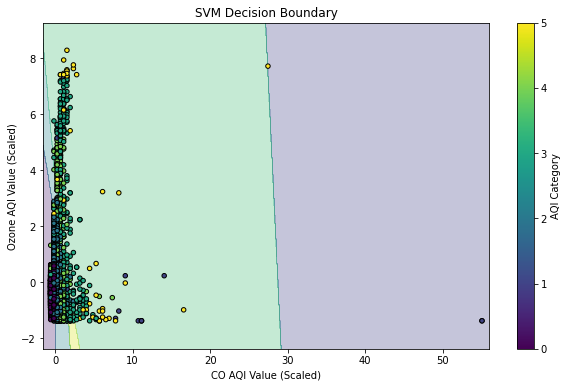

In [1]:
# Import necessary libraries for training and evaluation
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load your dataset
file_path = "the data set AQI COE project.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Select relevant columns
columns_to_use = ['CO AQI Value', 'Ozone AQI Value', 'AQI Category']  # Adjusted to use relevant columns
data = data[columns_to_use].dropna()

# Encode the target variable (AQI Category)
label_encoder = LabelEncoder()
data['AQI Category'] = label_encoder.fit_transform(data['AQI Category'])

# Split the data into training and testing sets
X = data[['CO AQI Value', 'Ozone AQI Value']]
y = data['AQI Category']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the SVM model with a linear kernel
svm = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm.fit(X_train, y_train)

# Predict the test set results
y_pred_svm = svm.predict(X_test)

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print("\nSVM Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('CO AQI Value (Scaled)')
    plt.ylabel('Ozone AQI Value (Scaled)')
    plt.colorbar(label='AQI Category')
    plt.show()

# Plot SVM decision boundary
plot_decision_boundary(svm, X_train, y_train, "SVM Decision Boundary")

C:\Users\tamem\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Soft Margin SVM Performance:
Accuracy: 0.6041
Precision: 0.5989
Recall: 0.6041


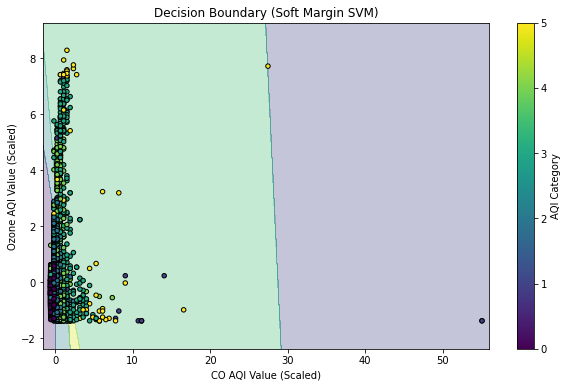

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load your dataset
file_path = "the data set AQI COE project.csv"  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Select relevant columns
columns_to_use = ['CO AQI Value', 'Ozone AQI Value', 'AQI Category']
data = data[columns_to_use].dropna()

# Encode the target variable
label_encoder = LabelEncoder()
data['AQI Category'] = label_encoder.fit_transform(data['AQI Category'])

# Prepare features and target
X = data[['CO AQI Value', 'Ozone AQI Value']]
y = data['AQI Category']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('CO AQI Value (Scaled)')
    plt.ylabel('Ozone AQI Value (Scaled)')
    plt.colorbar(label='AQI Category')
    plt.show()

# Train and evaluate Soft Margin SVM
soft_margin_svm = SVC(kernel='linear', C=1, random_state=42)  # Soft margin with C=1
soft_margin_svm.fit(X_train, y_train)

# Predict the test set results
y_pred_svm = soft_margin_svm.predict(X_test)

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print("\nSoft Margin SVM Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")

# Plot decision boundary for soft margin
plot_decision_boundary(soft_margin_svm, X_train, y_train, "Decision Boundary (Soft Margin SVM)")


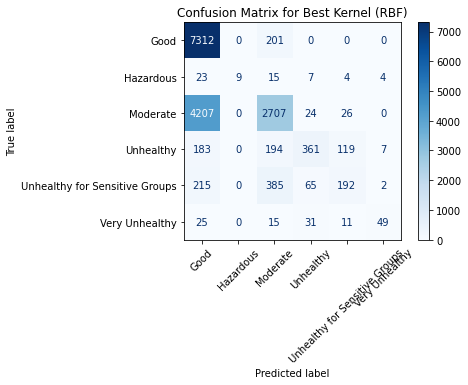

Accuracy: 0.6484
Precision: 0.6847
Recall: 0.6484


In [6]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = "the data set AQI COE project.csv"  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Select relevant columns
columns_to_use = ['CO AQI Value', 'Ozone AQI Value', 'AQI Category']
data = data[columns_to_use].dropna()

# Encode the target variable
label_encoder = LabelEncoder()
data['AQI Category'] = label_encoder.fit_transform(data['AQI Category'])

# Prepare features (X_vis) and target (y)
X_vis = data[['CO AQI Value', 'Ozone AQI Value']]
y = data['AQI Category']

# Scale features
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Train the best kernel model (RBF)
best_kernel_model = SVC(kernel='rbf', C=1, random_state=42)  # Using RBF as an example
best_kernel_model.fit(X_vis_scaled, y)

# Predict using the best kernel model
y_pred_best_kernel = best_kernel_model.predict(X_vis_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_best_kernel)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y, y_pred_best_kernel)
precision = precision_score(y, y_pred_best_kernel, average='weighted')
recall = recall_score(y, y_pred_best_kernel, average='weighted')

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix for Best Kernel (RBF)')
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



SVM Performance (RBF Kernel):
Accuracy: 0.6484
Precision: 0.6782
Recall: 0.6484


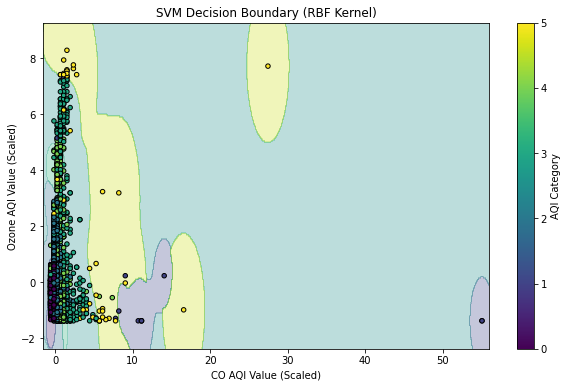

In [7]:
# Import necessary libraries for training and evaluation
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load your dataset
file_path = "the data set AQI COE project.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Select relevant columns
columns_to_use = ['CO AQI Value', 'Ozone AQI Value', 'AQI Category']  # Adjusted to use relevant columns
data = data[columns_to_use].dropna()

# Encode the target variable (AQI Category)
label_encoder = LabelEncoder()
data['AQI Category'] = label_encoder.fit_transform(data['AQI Category'])

# Split the data into training and testing sets
X = data[['CO AQI Value', 'Ozone AQI Value']]
y = data['AQI Category']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the SVM model with an RBF kernel (appropriate for non-linear data)
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the SVM model
svm.fit(X_train, y_train)

# Predict the test set results
y_pred_svm = svm.predict(X_test)

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print("\nSVM Performance (RBF Kernel):")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('CO AQI Value (Scaled)')
    plt.ylabel('Ozone AQI Value (Scaled)')
    plt.colorbar(label='AQI Category')
    plt.show()

# Plot SVM decision boundary
plot_decision_boundary(svm, X_train, y_train, "SVM Decision Boundary (RBF Kernel)")
